# Stock Analysis in matplotlib
Tutorial from http://blog.yhat.com/posts/stock-data-python.html  
An Introduction to Stock Market Data Analysis with Python (Part 1)  
Markdown: add two spaces to end to make newline.  

In [5]:
import pandas as pd
from pandas_datareader import data as web
# Package and modules for importing data; this code may change depending on pandas version
import datetime

In [16]:
# We will look at stock prices over the past year, starting at January 1, 2016
end = datetime.date.today()
print (end)
start = end.replace(year = end.year - 1)
print (start)
# First argument is the series we want, 
# second is the source ("yahoo" for Yahoo! Finance)
# third is the start date, fourth is the end date
myStock = "SNAP" # Bank of America
stock = web.DataReader(myStock, "yahoo", start, end)
print (type(stock))
print ("Last 5 Days")
stock.head()

2017-03-18
2016-03-18
<class 'pandas.core.frame.DataFrame'>
Last 5 Days


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-02,24.000000,26.049999,23.500000,24.480000,217048900,24.480000
2017-03-03,26.389999,29.440001,26.059999,27.090000,147899300,27.090000
2017-03-06,28.170000,28.250000,23.770000,23.770000,72472600,23.770000
2017-03-07,22.209999,22.500000,20.639999,21.440001,71700600,21.440001
2017-03-08,22.030001,23.430000,21.309999,22.809999,49724600,22.809999


In [29]:
print ("First 5 Days in Last Year")
stock.tail()

First 5 Days in Last Year


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-13,22.049999,22.150000,20.959999,21.090000,20487700,21.090000
2017-03-14,20.900000,20.980000,20.150000,20.580000,19959300,20.580000
2017-03-15,20.080000,21.400000,20.049999,20.770000,24883500,20.770000
2017-03-16,20.650000,20.690001,19.750000,19.889999,25493400,19.889999
2017-03-17,19.799999,19.850000,18.900000,19.540001,33376500,19.540001


- Open: Price of stock at start of trading day (may not be closing price of previous day) 
- High: Highest price of the stock on this day, Low is lowest 
- Close: Price at closing time 
- Volume: Amount of stocks traded 
- Adjusted Close: the closing price of the stock that adjusts the price of the stock for corporate actions
- Stock Split: Company makes all exisiting stocks worth two, halving the price of each 
- Dividends: Payout of company profits per share 

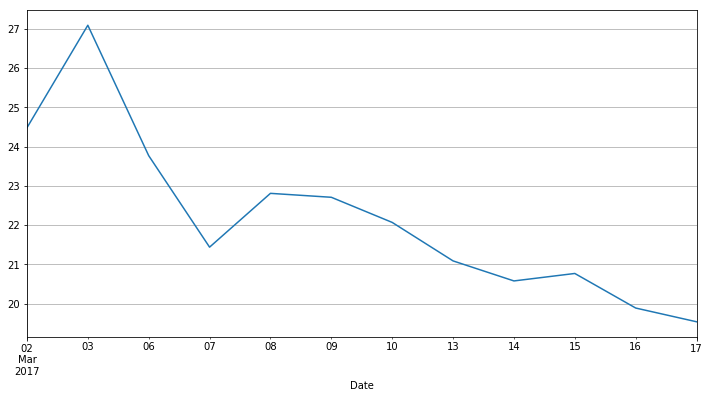

In [18]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Larger plots
stock["Adj Close"].plot(grid = True) # adds grid lining 

In [19]:
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)
apple = web.DataReader("AAPL", "yahoo", start, end)

In [20]:
# Create a DataFrame consisting of the adjusted closing price of these stocks, 
# first by making a list of these objects and using the join method
stocks = pd.DataFrame({myStock : stock["Adj Close"], #compare to others 
                       "AAPL": apple["Adj Close"],
                       "MSFT": microsoft["Adj Close"],
                       "GOOG": google["Adj Close"]})
stocks.tail()

,AAPL,GOOG,MSFT,SNAP
Date,,,,
2017-03-13,139.199997,845.539978,64.709999,21.090000
2017-03-14,138.990005,845.619995,64.410004,20.580000
2017-03-15,140.460007,847.200012,64.750000,20.770000
2017-03-16,140.690002,848.780029,64.639999,19.889999
2017-03-17,139.990005,852.119995,64.870003,19.540001


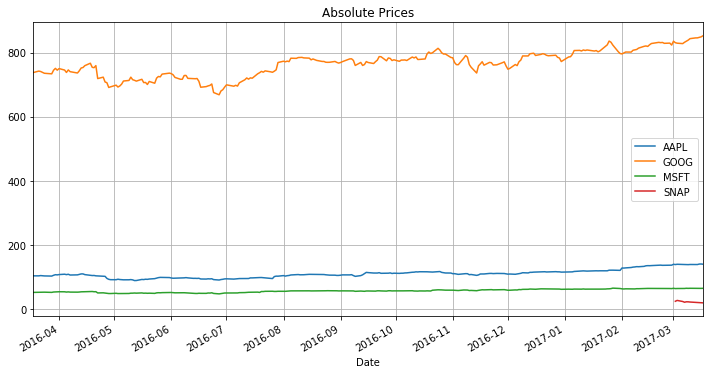

In [21]:
stocks.plot(grid = True, title="Absolute Prices") 

Since Google is a much more expensive stock, we should compare relative changes of these assets rather than their actual values. We can get a secondary_y axis for the others:

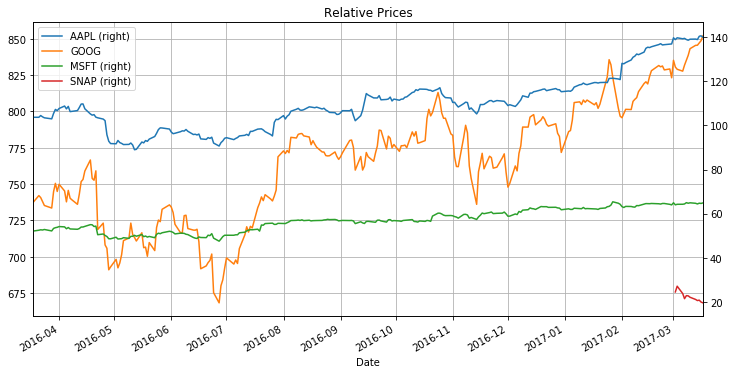

In [22]:
stocks.plot(secondary_y = ["AAPL", "MSFT", myStock], grid = True, title = "Relative Prices")

A "better" solution, though, would be to plot the information we actually want: the stock's returns. This involves transforming the data into something more useful for our purposes. There are multiple transformations we could apply.

One transformation would be to consider the stock's return since the beginning of the period of interest. In other words, we plot:

In [23]:
from IPython.display import display, Math, Latex
display(Math(r'return = \frac{price_t}{price_0}'))

<IPython.core.display.Math object>

In [24]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,GOOG,MSFT,SNAP
Date,,,,
2016-03-18,1.000000,1.000000,1.000000,NaN
2016-03-21,0.999906,1.006087,1.006917,NaN
2016-03-22,1.007553,1.004271,1.010843,NaN
2016-03-23,1.001983,1.000624,1.008974,NaN
2016-03-24,0.997640,0.996882,1.013460,NaN


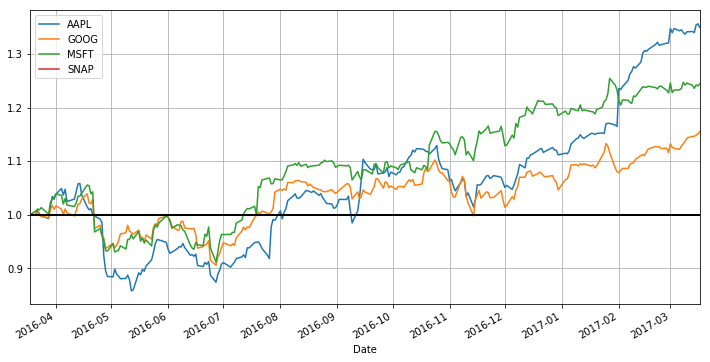

In [25]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

This is a much more useful plot. We can now see how profitable each stock was since the beginning of the period.
Furthermore, we see that these stocks are highly correlated; they generally move in the same direction, 
a fact that was difficult to see in the other charts.

